<img src="logo.png">

# Gráficos de barras

La tabla ``msleep.csv``, que puedes descargar de nuestro repositorio, contiene información sobre 83 mamíferos diferentes. La información tiene su nombre común, su género, su tipo de dieta, su orden taxológico, su estado de conservación, así como las horas de sueño al día que duermen, las horas que corresponden al sueño profundo (REM), cuánto dura su [ciclo de sueño](https://www.nhlbi.nih.gov/es/salud/sueno/estadios-del-sueno#:~:text=Al%20dormir%2C%20se%20atraviesa%20un,entre%20un%20ciclo%20y%20otro.), cuántas horas se mantiene despierto al día, su masa cerebral (en Kg) y su masa corporal (también en kg).

Resuelve los siguientes problemas:

In [2]:
# Cargado de bibliotecas y lectura del archivo

import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import *
from plotnine import *
import os

os.chdir("C:\\Users\\Usuario\\Documents\\scidata\\24_cdd_py\\practicas\\mamiferos")
sp = pd.read_csv('msleep.csv')

In [3]:
# Cambia el nombre de cada columna a su traducción en español.

sp = (sp >> rename(nombre = "name",
                   género = "genus",
                   dieta = "vore",
                   orden = "order",
                   conservacion = "conservation",
                   horas_sueño = "sleep_total",
                   horas_rem = "sleep_rem",
                   ciclo_sueño = "sleep_cycle",
                   horas_despierto = "awake",
                   masa_cerebral = "brainwt",
                   masa_corporal = "bodywt")
     )

In [7]:
# Ordena la tabla alaféticamente por dieta, orden y nombre, y muestra el género de los tres primeros renglones. 

sp >> arrange(_.dieta,_.orden,_.nombre) >> select(_.género) >> head(3)

,género
81,Vulpes
58,Phoca
0,Acinonyx


In [15]:
# ¿Cuál es la dieta más común en la tabla? ¿Cuántos omnívoros hay?

sp >> group_by(_.dieta) >> summarize(total_dieta = n(_)) >> arrange(-_.total_dieta) 

,dieta,total_dieta
1,herbi,32
3,omni,20
0,carni,19
4,NaN,7
2,insecti,5


In [16]:
# ¿Cuál es el orden más común en la tabla?  ¿Hay más carnívora que primates?

sp >> group_by(_.orden) >> summarize(total_orden = n(_)) >> arrange(-_.total_orden) 

,orden,total_orden
16,Rodentia,22
2,Carnivora,12
14,Primates,12
1,Artiodactyla,6
18,Soricomorpha,5
3,Cetacea,3
9,Hyracoidea,3
12,Perissodactyla,3
4,Chiroptera,2
5,Cingulata,2


In [24]:
# ¿Cuáles son los primates que más y menos duermen?
(
sp >> filter(_.orden == "Primates",~_.horas_sueño.isna()) >> 
    filter((_.horas_sueño == _.horas_sueño.max()) | (_.horas_sueño == _.horas_sueño.min()))
)

,nombre,género,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.0155,0.48
33,Human,Homo,omni,Primates,NaN,8.0,1.9,1.5,16.0,1.3200,62.00


In [ ]:
# ¿Qué resultado esperarías obtener si sumas las horas de sueño con las horas despierto en cada renglón?
# Calcula una nueva columna llamada "total_despierto_dormido" que sea esta suma.



In [25]:
# Añade el porcentaje de masa que representa el cerebro respecto del cuerpo de cada animal y responde:

sp_ratio = sp >> mutate(per_br_bd = 100*(_.masa_cerebral)/_.masa_corporal)
sp_ratio

,nombre,género,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000,NaN
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,3.229167
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350,NaN
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019,1.526316
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,0.070500
...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,2.403846
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330,NaN
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000,0.875000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380,1.316568


In [26]:
#### ¿Qué animales tienen el mayor y menor porcentaje de masa cerebral respecto a la corporal?

sp_ratio >> filter((_.per_br_bd == _.per_br_bd.max()) | (_.per_br_bd == _.per_br_bd.min())) >> arrange(-_.per_br_bd)

,nombre,género,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd
70,Thirteen-lined ground squirrel,Spermophilus,herbi,Rodentia,lc,13.8,3.4,0.216667,10.2,0.004,0.101,3.960396
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.423,600.000,0.070500


In [27]:
#### ¿Cuántos animales tienen dicho porcentaje mayor al del humano?

per_br_bd_human = sp_ratio[sp_ratio["nombre"] == "Human"]["per_br_bd"].iloc[0]
per_br_bd_human

2.129032258064516

In [32]:
(sp_ratio >> filter(_.nombre == "Human") >> select(_.per_br_bd)).iloc[0,0]

2.129032258064516

In [33]:
sp_ratio >> filter(_.per_br_bd > per_br_bd_human) >> count()

,n
0,9


In [34]:
# Añade una columna que indique si el animal duerme 8 o menos horas.

sp_ratio = sp_ratio >> mutate(ocho_horas = np.where(_.horas_sueño <= 8,"Menos de 8 horas de sueño","Más de 8 horas de sueño"))
sp_ratio

,nombre,género,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd,ocho_horas
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000,NaN,Más de 8 horas de sueño
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,3.229167,Más de 8 horas de sueño
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350,NaN,Más de 8 horas de sueño
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019,1.526316,Más de 8 horas de sueño
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,0.070500,Menos de 8 horas de sueño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104,2.403846,Más de 8 horas de sueño
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330,NaN,Menos de 8 horas de sueño
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000,0.875000,Menos de 8 horas de sueño
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380,1.316568,Más de 8 horas de sueño


In [35]:
sp_ratio_conocido = (sp_ratio >> 
           filter(~_.per_br_bd.isna())           
          )

In [36]:
# Crea un gráfico de barras donde se indique cuántos animales de cada dieta tienen mayor relación cerebro/cuerpo respecto 
# de los humanos, separando aquellos que duermen menos de 8 horas de los que duermen mas de 8 horas.

sp_ratio_conocido = sp_ratio_conocido >> mutate(mayor_humano = np.where(_.per_br_bd > per_br_bd_human,"Sí","No"))
sp_ratio_conocido

,nombre,género,dieta,orden,conservacion,horas_sueño,horas_rem,ciclo_sueño,horas_despierto,masa_cerebral,masa_corporal,per_br_bd,ocho_horas,mayor_humano
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480,3.229167,Más de 8 horas de sueño,Sí
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019,1.526316,Más de 8 horas de sueño,No
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000,0.070500,Menos de 8 horas de sueño,No
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000,0.500000,Más de 8 horas de sueño,No
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800,0.663514,Menos de 8 horas de sueño,No
10,Goat,Capri,herbi,Artiodactyla,lc,5.3,0.6,NaN,18.7,0.11500,33.500,0.343284,Menos de 8 horas de sueño,No
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728,0.755495,Más de 8 horas de sueño,No
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420,1.523810,Más de 8 horas de sueño,No
14,Star-nosed mole,Condylura,omni,Soricomorpha,lc,10.3,2.2,NaN,13.7,0.00100,0.060,1.666667,Más de 8 horas de sueño,No
15,African giant pouched rat,Cricetomys,omni,Rodentia,NaN,8.3,2.0,NaN,15.7,0.00660,1.000,0.660000,Más de 8 horas de sueño,No


In [37]:
resumen = sp_ratio_conocido >> group_by(_.dieta,_.mayor_humano,_.ocho_horas) >> count()
resumen

,dieta,mayor_humano,ocho_horas,n
0,carni,No,Menos de 8 horas de sueño,2
1,carni,No,Más de 8 horas de sueño,7
2,herbi,No,Menos de 8 horas de sueño,11
3,herbi,No,Más de 8 horas de sueño,8
4,herbi,Sí,Más de 8 horas de sueño,1
5,insecti,No,Más de 8 horas de sueño,4
6,insecti,Sí,Más de 8 horas de sueño,1
7,omni,No,Menos de 8 horas de sueño,1
8,omni,No,Más de 8 horas de sueño,10
9,omni,Sí,Más de 8 horas de sueño,6


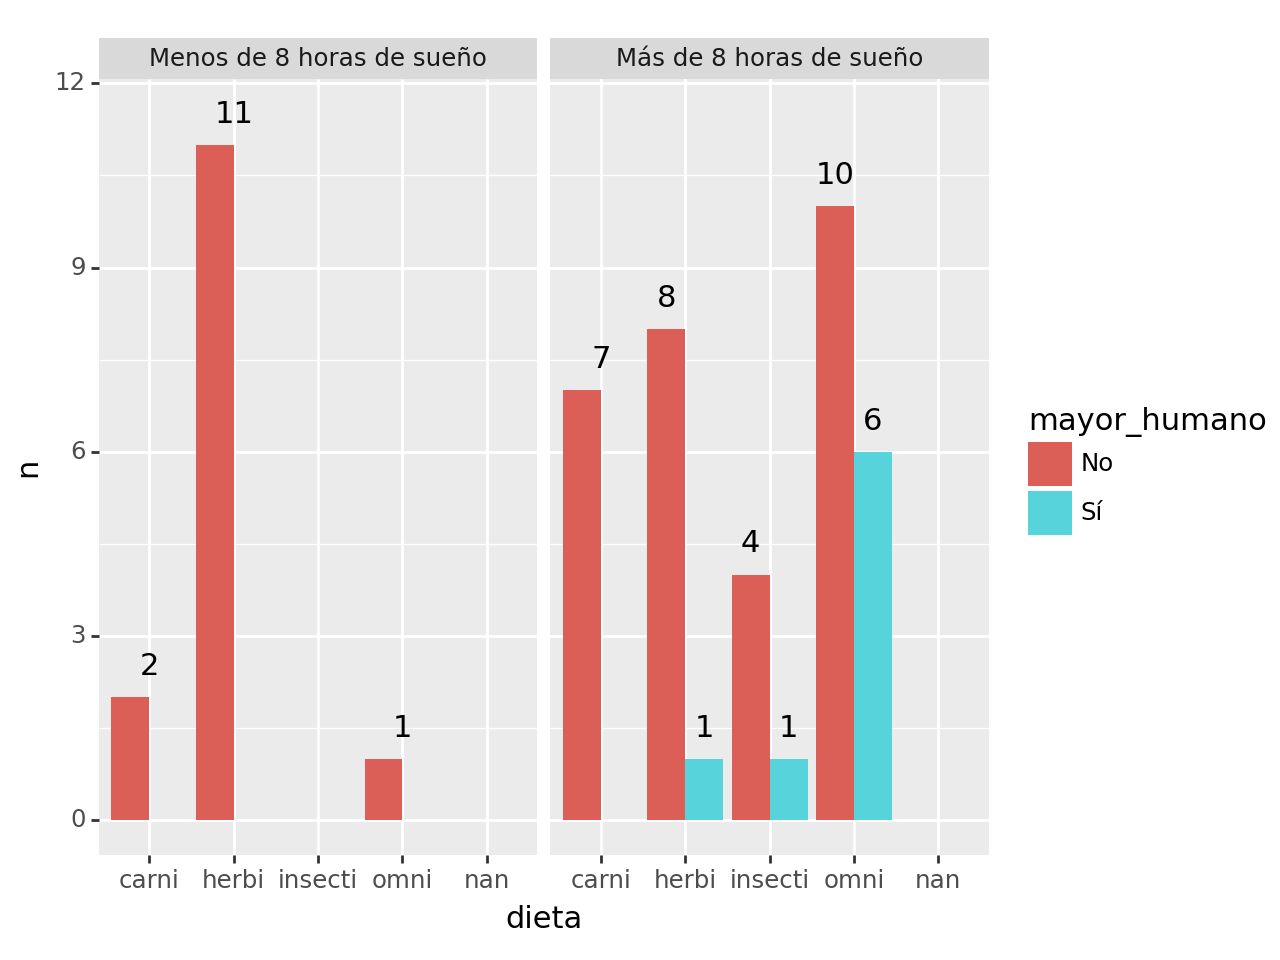

<Figure Size: (640 x 480)>

In [40]:
(ggplot() +
    geom_col(data = resumen,
             mapping = aes(x="dieta",y="n",fill="mayor_humano"),
             position = position_dodge(preserve = "single")) +
    geom_text(data = resumen,
             mapping = aes(x="dieta",y="n+0.5",fill="mayor_humano",label="n"),
             position = position_dodge(width = 0.9)
             ) +
 facet_wrap("~ocho_horas")
)